In [56]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


/home/jfm343/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['fill']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [80]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

In [81]:
path=pathy+'data/tempsweep_radial_ME_scan__2022-05-05-07-24-15'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])

reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__10/data_ME_2022-05-05-07-24-14.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__3/data_ME_2022-05-04-19-32-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__2/data_ME_2022-05-04-15-34-20.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__5/data_ME_2022-05-05-03-31-35.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial_ME_scan__2022-05-05-07-24-15/tempsweep_radial_ME_scan__4/data_ME_2022-05-04-23-32-04.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/

# Extracting fits at low $\omega$, $q$, $T$

[0.03085152 0.03085152 0.03095072 0.03095072 0.09255456 0.09285215
 0.09285215 0.1542576  0.1542576  0.15475359 0.21596063 0.21596063
 0.21665502 0.27766367 0.27855646 0.03057965 0.03057965 0.03066806
 0.09173895 0.09173895 0.09200418 0.15289825 0.15334029 0.21405754
 0.21405754 0.21467641 0.27521684 0.27601253 0.02994262 0.02994262
 0.0300212  0.08982787 0.08982787 0.09006359 0.14971312 0.14971312
 0.15010598 0.20959837 0.20959837 0.21014837 0.26948362 0.27019076
 0.02933961 0.02933961 0.02941134 0.08801883 0.08823403 0.14669805
 0.14669805 0.14705671 0.20537727 0.20537727 0.2058794  0.26405649
 0.26470208 0.02891717 0.02891717 0.0289856  0.0289856  0.0867515
 0.0867515  0.08695681 0.08695681 0.14458583 0.14458583 0.14492801
 0.20242017 0.20242017 0.20289922 0.20289922 0.2602545  0.26087043
 0.0287815  0.0287815  0.02884845 0.02884845 0.08634451 0.08654535
 0.14390752 0.14390752 0.14424224 0.14424224 0.20147053 0.20147053
 0.20193914 0.20193914 0.25903353 0.25963604]
(150, 18) 88
0
1


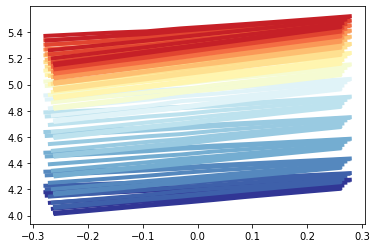

In [59]:
df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
Qu=df['Q'].unique()
T=1.0
print(Qu)

def fit(df, *args,axi,Q,w,l,T):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    for s,Qq in enumerate(w):
        print(s)
        plot(d.iloc[s], linewidth=4, color=plt.cm.RdYlBu_r(s/float(sW)))
    return None


thets=df['theta'].unique()

# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )&(df['T'] ==2.0 )]
    print(np.shape(df2), np.size(Qu))
    df2p=df2.copy()
    df2p['Q']=df2['Q']*np.sign(df2['QFX'])
    Qu=df2p['Q'].unique()
    w=df2p['freq'].unique()
    fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=T)
    
    
    

(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


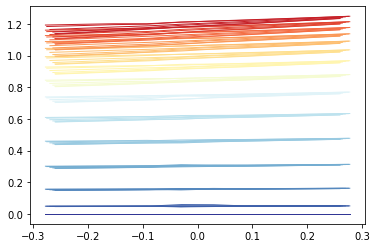

In [60]:


def fit(df, *args,axi,Q,w,l,T):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    for s,Qq in enumerate(w):
        print(s)
        plot(d.iloc[s]-d.iloc[0], linewidth=1, color=plt.cm.RdYlBu_r(s/float(sW)))
    return None


thets=df['theta'].unique()

# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )&(df['T'] ==2.0 )]
    print(np.shape(df2), np.size(Qu))
    df2p=df2.copy()
    df2p['Q']=df2['Q']*np.sign(df2['QFX'])
    Qu=df2p['Q'].unique()
    w=df2p['freq'].unique()
    fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=T)
    


(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(150, 18) 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


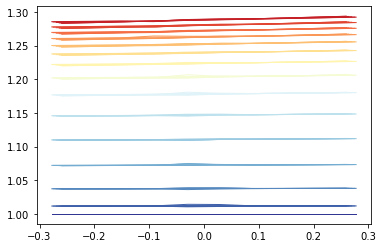

In [61]:

def fit(df, *args,axi,Q,w,l,T):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    for s,Qq in enumerate(w):
        print(s)
        plot(d.iloc[s]/d.iloc[0], linewidth=1, color=plt.cm.RdYlBu_r(s/float(sW)))
    return None


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]

thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )&(df['T'] ==2.0 )]
    print(np.shape(df2), np.size(Qu))
    df2p=df2.copy()
    df2p['Q']=df2['Q']*np.sign(df2['QFX'])
    Qu=df2p['Q'].unique()
    w=df2p['freq'].unique()
    fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=T)

(150, 18) 10
(10,) (15, 10)
maxQ 0.2776636721465174 -150.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.2752168431110715 -144.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.2694836239148908 -138.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.2640564862257818 -132.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.26025450298693 -126.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.2590335345988323 -119.99999999999999
(150, 18) 10
(10,) (15, 10)
maxQ 0.2776636721465174 -150.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.2752168431110715 -144.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.2694836239148908 -138.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.2640564862257818 -132.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.26025450298693 -126.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.2590335345988323 -119.99999999999999
(150, 18) 10
(10,) (15, 10)
maxQ 0.2776636721465174 -150.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.2752168431110715 -144.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.2694836239148908 -138.00000000000003
(150, 18) 10
(1

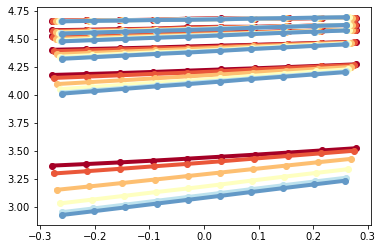

In [62]:
def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    mid=(d.iloc[0,5]+d.iloc[0,4])/2
    print(np.shape(Q), np.shape(d))
    plot((d.iloc[0]), linewidth=4,marker='o', color=plt.cm.RdYlBu(l/float(6)), label=str(thets[l]*180/np.pi))
    print('maxQ',np.max(Q),thets[l]*180/np.pi)


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for T in [1.0,2.0,3.0,4.0,5.0,10.0]:
    for l,th in enumerate(thets):
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==T )]
        print(np.shape(df2), np.size(Qu))
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=T)


    # plt.legend()

(150, 18) 10
(10,) (15, 10)
maxQ 0.2776636721465174 -150.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.2752168431110715 -144.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.2694836239148908 -138.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.2640564862257818 -132.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.26025450298693 -126.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.2590335345988323 -119.99999999999999
(150, 18) 10
(10,) (15, 10)
maxQ 0.2776636721465174 -150.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.2752168431110715 -144.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.2694836239148908 -138.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.2640564862257818 -132.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.26025450298693 -126.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.2590335345988323 -119.99999999999999
(150, 18) 10
(10,) (15, 10)
maxQ 0.2776636721465174 -150.00000000000003
(150, 18) 10
(10,) (15, 10)
maxQ 0.2752168431110715 -144.0
(150, 18) 10
(10,) (15, 10)
maxQ 0.2694836239148908 -138.00000000000003
(150, 18) 10
(1

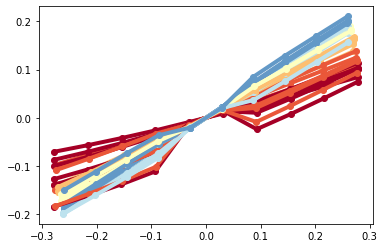

In [63]:
def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    mid=(d.iloc[0,5]+d.iloc[0,4])/2
    print(np.shape(Q), np.shape(d))
    plot((d.iloc[0]-mid)*T, linewidth=4,marker='o', color=plt.cm.RdYlBu(l/float(6)), label=str(thets[l]*180/np.pi))
    print('maxQ',np.max(Q),thets[l]*180/np.pi)


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for T in [1.0,2.0,3.0,4.0,5.0,10.0]:
    for l,th in enumerate(thets):
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==T )]
        print(np.shape(df2), np.size(Qu))
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=T)

    # plt.legend()

In [64]:
  
# # #electronic parameters
J=2*5.17 #in mev
tp1=568/J #in units of Js\
tp2=-tp1*108/568 #/tpp1
##coupling 
U=4000/J
g=100/J
Kcou=g*g/U
# fill=0.67 #van hove
fill=0.5
def Fermi_Vel(kx,ky):
  sq3y2=np.sqrt(3)*ky/2
  sq3y=np.sqrt(3)*ky
  vx=-tp1*(-2*np.cos(sq3y2)*np.sin(kx/2)-2*np.sin(kx)) +6*tp2*np.cos(sq3y2)*np.sin(3*kx/2)
  vy=2*np.sqrt(3)*tp1*np.cos(kx/2)*np.sin(sq3y2)-2*np.sqrt(3)*tp2*(-np.cos(3*kx/2)*np.sin(sq3y2)-np.sin(sq3y))
  return [vx,vy]



(150, 18) 10
(10,) (15, 10)
velo 139.59183069389425
maxQ 0.2776636721465174 -150.00000000000003
(150, 18) 10
(10,) (15, 10)
velo 149.54859338826944
maxQ 0.2752168431110715 -144.0
(150, 18) 10
(10,) (15, 10)
velo 171.1126818085877
maxQ 0.2694836239148908 -138.00000000000003
(150, 18) 10
(10,) (15, 10)
velo 189.72703857701592
maxQ 0.2640564862257818 -132.0
(150, 18) 10
(10,) (15, 10)
velo 201.91608219002947
maxQ 0.26025450298693 -126.0
(150, 18) 10
(10,) (15, 10)
velo 205.69696064407725
maxQ 0.2590335345988323 -119.99999999999999
(150, 18) 10
(10,) (15, 10)
velo 139.59183069389425
maxQ 0.2776636721465174 -150.00000000000003
(150, 18) 10
(10,) (15, 10)
velo 149.54859338826944
maxQ 0.2752168431110715 -144.0
(150, 18) 10
(10,) (15, 10)
velo 171.1126818085877
maxQ 0.2694836239148908 -138.00000000000003
(150, 18) 10
(10,) (15, 10)
velo 189.72703857701592
maxQ 0.2640564862257818 -132.0
(150, 18) 10
(10,) (15, 10)
velo 201.91608219002947
maxQ 0.26025450298693 -126.0
(150, 18) 10
(10,) (15, 10)


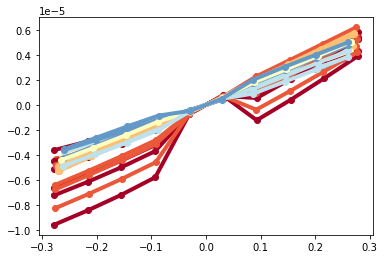

In [65]:
def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    mid=(d.iloc[0,5]+d.iloc[0,4])/2
    print(np.shape(Q), np.shape(d))
    [vx,vy]=Fermi_Vel(df['KFX'][0],df['KFY'][0])
    vf=np.sqrt(np.array(vx)[0]**2+np.array(vy)[0]**2)
    print('velo',vf)
    
    plot((d.iloc[0]-mid)*T/(vf**2), linewidth=4,marker='o', color=plt.cm.RdYlBu(l/float(6)), label=str(thets[l]*180/np.pi))
    print('maxQ',np.max(Q),thets[l]*180/np.pi)
    


thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for T in [1.0,2.0,3.0,4.0,5.0,10.0]:
    for l,th in enumerate(thets):
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==T )]
        print(np.shape(df2), np.size(Qu))
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=T)

    # plt.legend()

# testing linear fits for the momentum dependence at $\omega=0$

(150, 18) 88
velo 139.59183069389425
[3.44367636 0.28066518] [[ 8.62079438e-07 -4.81792946e-22]
 [-4.81792946e-22  2.74460724e-05]] (10,)
(150, 18) 10
velo 149.54859338826944
[3.39945096 0.37042123] [[ 2.84851197e-07 -0.00000000e+00]
 [ 0.00000000e+00  9.23079707e-06]] (10,)
(150, 18) 10
velo 171.1126818085877
[3.29286093 0.51463156] [[2.22222726e-08 1.31848439e-23]
 [1.31848439e-23 7.51094802e-07]] (10,)
(150, 18) 10
velo 189.72703857701592
[3.18576282 0.5807404 ] [[ 1.01233819e-07 -0.00000000e+00]
 [ 0.00000000e+00  3.56371505e-06]] (10,)
(150, 18) 10
velo 201.91608219002947
[3.10862435 0.59293729] [[ 2.26882295e-08 -1.23976036e-14]
 [-1.23976036e-14  8.22195598e-07]] (10,)
(150, 18) 10
velo 205.69696064407725
[3.0832781  0.59160565] [[2.66433980e-08 1.89800629e-16]
 [1.89800629e-16 9.74650220e-07]] (10,)
(150, 18) 10
velo 139.59183069389425
[4.22358179 0.1710582 ] [[ 2.91667682e-07 -0.00000000e+00]
 [ 0.00000000e+00  9.28583245e-06]] (10,)
(150, 18) 10
velo 149.54859338826944
[4.208

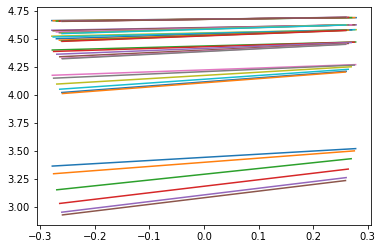

In [67]:
def scalingQ(omega, a,b):
    return a+b*omega


df=df.sort_values(by=['theta','freq', 'Q' ])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
Qu=df['Q'].unique()
T=1.0
# print(Qu)

alphaT=[]
AT=[]
Tf=[]


def fit(df, *args,axi,Q,w,l,T):
    d = df.pivot(index=args[1], columns=args[0], values=args[2])
    sW=np.size(w)
    mid=(d.iloc[0,5]+d.iloc[0,4])/2
    # print(np.shape(Q), np.shape(d))
    [vx,vy]=Fermi_Vel(df['KFX'][0],df['KFY'][0])
    vf=np.sqrt(np.array(vx)[0]**2+np.array(vy)[0]**2)
    print('velo',vf)
    y=d.iloc[0]
    popt, pcov = curve_fit(scalingQ, np.sort(np.array(Q)),np.array(d.iloc[0]))
    print(popt,pcov, np.shape(d.iloc[0]))
    # plot(Q,scalingQ(Q, popt[0],popt[1]))
    # plot(Q,d.iloc[0], linewidth=4,marker='o', color=plt.cm.RdYlBu(l/float(6)), label=str(thets[l]*180/np.pi))
    plot(np.sort(np.array(Q)),scalingQ(np.sort(np.array(Q)), popt[0],popt[1]))
    # plot(np.sort(np.array(Q)),np.array(d.iloc[0]), linewidth=4,marker='o', color=plt.cm.RdYlBu(l/float(6)), label=str(thets[l]*180/np.pi))
    # print('maxQ',np.max(Q),thets[l]*180/np.pi)
    alphaT.append(popt[0])
    AT.append(popt[1])
    Tf.append(thets[l])

thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for T in [1.0,2.0,3.0,4.0,5.0,10.0]:
    for l,th in enumerate(thets):
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==T )]
        print(np.shape(df2), np.size(Qu))
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2p['Q'].unique()
        w=df2p['freq'].unique()
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=T)

(150, 18) 10
velo 139.59183069389425
(150, 18) 10
velo 149.54859338826944
(150, 18) 10
velo 171.1126818085877
(150, 18) 10
velo 189.72703857701592
(150, 18) 10
velo 201.91608219002947
(150, 18) 10
velo 205.69696064407725
(150, 18) 10
velo 139.59183069389425
(150, 18) 10
velo 149.54859338826944
(150, 18) 10
velo 171.1126818085877
(150, 18) 10
velo 189.72703857701592
(150, 18) 10
velo 201.91608219002947
(150, 18) 10
velo 205.69696064407725
(150, 18) 10
velo 138.6411166320516
(150, 18) 10
velo 148.97463988941072
(150, 18) 10
velo 170.80809317003465
(150, 18) 10
velo 189.57581201668384
(150, 18) 10
velo 201.8244484162383
(150, 18) 10
velo 205.63632567816566
(150, 18) 10
velo 138.6411166320516
(150, 18) 10
velo 148.97463988941072
(150, 18) 10
velo 170.80809317003465
(150, 18) 10
velo 189.57581201668384
(150, 18) 10
velo 201.8244484162383
(150, 18) 10
velo 205.63632567816566
(150, 18) 10
velo 138.6411166320516
(150, 18) 10
velo 148.97463988941072
(150, 18) 10
velo 170.80809317003465
(150, 18

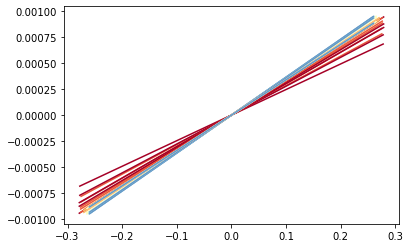

In [129]:
def scalingQ(omega, a,b):
    return a+b*omega



int=[]
slope=[]
Tf=[]


def fit(df3, *args,axi,Q,w,l,T):
    dd=df3.copy()
    d = dd.pivot(index=args[1], columns=args[0], values=args[2])
   
    [vx,vy]=Fermi_Vel(dd['KFX'][0],dd['KFY'][0])
    vf=np.sqrt(np.array(vx)[0]**2+np.array(vy)[0]**2)
    print('velo',vf)
    y=np.array(d.iloc[0])
    mid=(y[4])/2
    x=np.sort(np.array(Q))
    popt, pcov = curve_fit(scalingQ, x,y)
    y2= np.array(scalingQ(x, popt[0],popt[1]))
    shifted=y2-(y2[5]+y2[4])/2
    plot(x,shifted*T/(vf), color=plt.cm.RdYlBu(l/float(6)))

    int.append(popt[0])
    slope.append(popt[1])
    Tf.append(thets[l])

thets=df['theta'].unique()
# thets=[df['theta'].unique()[0]]
df=df.sort_values(by=[ 'freq','T','theta'])
for T in [2.0,3.0,4.0,5.0,10.0]:
    for l,th in enumerate(thets):
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==T )]
        print(np.shape(df2), np.size(Qu))
        df2p=df2.copy()
        df2p['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=np.array(df2p['Q'].unique())
        w=np.array(df2p['freq'].unique())
        fit(df2p, 'Q', 'freq', 'SE', axi= 1, Q=Qu,w=w,l=l, T=T)

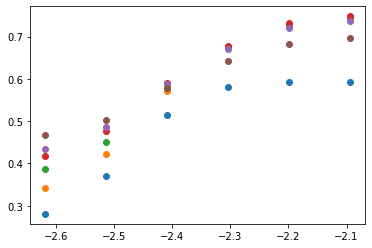

In [128]:
        
# plt.scatter(Tf, slope)
for i,T in enumerate([1.0,2.0,3.0,4.0,5.0,10.0]):
    for l,th in enumerate(thets):
        if l==0:
            
            plt.scatter(Tf[6*i+l:6*i+l+6], T*np.array(slope[6*i+l:6*i+l+6]))



# Testing scaling collapse at several temperatures, momenta, angle frequency

(150, 18) 10
[0.00088244 0.00092093]
[0.00088156 0.00092081]
[0.00088063 0.00092078]
[0.00088023 0.00092124]
[0.00087565 0.00091796]
[0.00087674 0.00092043]
[0.00087581 0.00092144]
[0.00087432 0.00092186]
[0.00087266 0.00092234]
[0.00087083 0.00092289]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


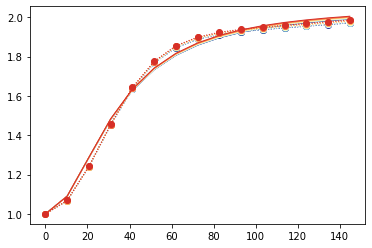

(150, 18) 10
[2.96991184e-04 9.79258789e-05]
[2.96682932e-04 9.80040013e-05]
[2.96459237e-04 9.81162601e-05]
[2.98070765e-04 9.85426767e-05]
[2.90792179e-04 9.69277123e-05]
[2.94222640e-04 9.80676968e-05]
[2.94661377e-04 9.85506839e-05]
[2.94257025e-04 9.87331448e-05]
[2.93756541e-04 9.89015364e-05]
[2.93225412e-04 9.90829923e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


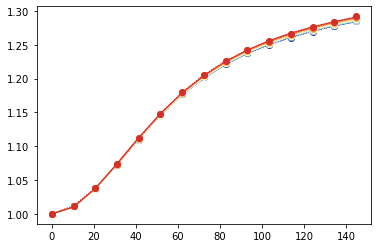

(150, 18) 10
[1.40358066e-04 3.06554386e-05]
[-1.40250361e-04  3.06958608e-05]
[1.40311416e-04 3.07615856e-05]
[ 1.42533164e-04 -3.10108026e-05]
[ 1.34949584e-04 -3.00586183e-05]
[ 1.38557620e-04 -3.06671728e-05]
[ 1.39484445e-04 -3.09594428e-05]
[ 1.39417833e-04 -3.10532392e-05]
[-1.39256424e-04  3.11342753e-05]
[ 1.39088578e-04 -3.12216536e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


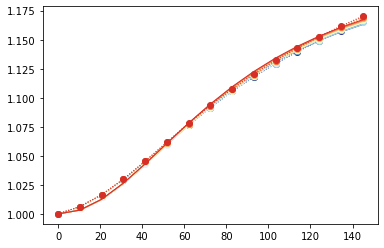

(150, 18) 10
[-9.49275974e-05 -1.71092451e-05]
[-9.48785719e-05 -1.71351535e-05]
[-9.48147014e-05 -1.71602093e-05]
[-9.29195270e-05 -1.69717925e-05]
[8.86421337e-05 1.63365376e-05]
[-8.96666138e-05  1.65073112e-05]
[9.45216620e-05 1.73047783e-05]
[9.45384824e-05 1.73643715e-05]
[9.44773891e-05 1.74159087e-05]
[9.44157903e-05 1.74714595e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


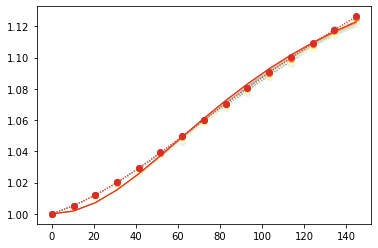

(150, 18) 10
[0.00087733 0.00091674]
[0.00087655 0.00091691]
[0.00087568 0.00091712]
[0.00087457 0.00091741]
[0.00087448 0.00091911]
[0.00087346 0.00091949]
[0.00087178 0.00091902]
[0.00087056 0.0009197 ]
[0.0008692  0.00092045]
[0.00086768 0.00092125]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


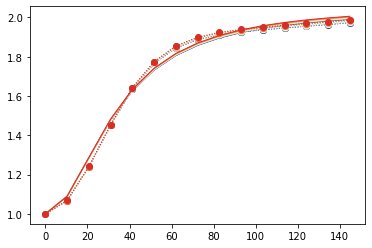

(150, 18) 10
[2.97106839e-04 9.78109316e-05]
[2.96739999e-04 9.79065625e-05]
[2.96228392e-04 9.79963104e-05]
[2.96362984e-04 9.83365197e-05]
[2.98169899e-04 9.92913482e-05]
[2.97120363e-04 9.91919568e-05]
[2.94628213e-04 9.85629835e-05]
[2.94124644e-04 9.87228116e-05]
[2.93611814e-04 9.89006989e-05]
[2.93073363e-04 9.90901648e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


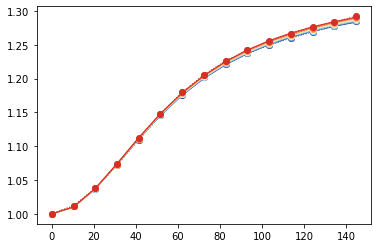

(150, 18) 10
[ 1.40419227e-04 -3.06224477e-05]
[1.40288645e-04 3.06696292e-05]
[1.40056438e-04 3.07188108e-05]
[ 1.41437275e-04 -3.10422154e-05]
[ 1.43526400e-04 -3.15841418e-05]
[ 1.42350521e-04 -3.14483116e-05]
[ 1.39579109e-04 -3.09861213e-05]
[ 1.39395225e-04 -3.10600886e-05]
[ 1.39228388e-04 -3.11443595e-05]
[-1.39057053e-04  3.12344101e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


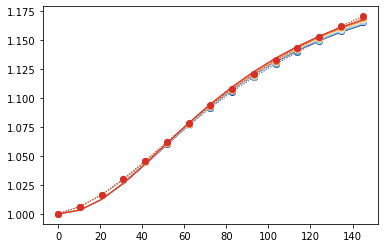

(150, 18) 10
[-9.49321979e-05 -1.70904429e-05]
[9.48808375e-05 1.71211520e-05]
[-9.49206945e-05 -1.71596785e-05]
[ 9.84131847e-05 -1.74346188e-05]
[8.92839235e-05 1.64623660e-05]
[8.99940476e-05 1.65909939e-05]
[9.45119649e-05 1.73096812e-05]
[9.45232331e-05 1.73703255e-05]
[9.44618031e-05 1.74238799e-05]
[9.44005548e-05 1.74810536e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


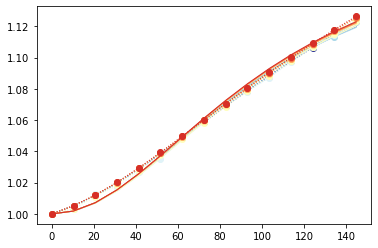

(150, 18) 10
[0.00086917 0.000909  ]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


[0.00086797 0.00090939]
[0.00086683 0.0009099 ]
[0.00086657 0.0009111 ]
[0.0008645  0.00091083]
[0.00086445 0.00091285]
[0.00086253 0.00091307]
[0.00086145 0.00091415]
[0.00086033 0.0009153 ]
[0.00085914 0.00091651]


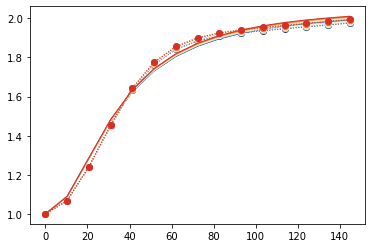

(150, 18) 10
[2.97339328e-04 9.75783309e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


[2.96860343e-04 9.77049508e-05]
[2.96396420e-04 9.78433111e-05]
[2.97551375e-04 9.82629536e-05]
[2.94025824e-04 9.77067458e-05]
[2.96280971e-04 9.86895313e-05]
[2.94324830e-04 9.84832567e-05]
[2.93782245e-04 9.86844909e-05]
[2.93227057e-04 9.88845468e-05]
[2.92654084e-04 9.90939482e-05]


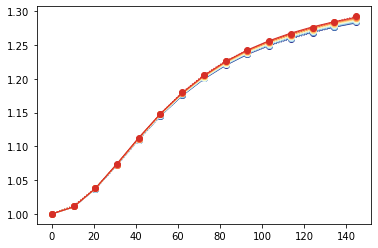

(150, 18) 10
[ 1.40534695e-04 -3.05583743e-05]
[ 1.40372910e-04 -3.06187384e-05]
[ 1.40201368e-04 -3.06793921e-05]
[1.41381562e-04 3.08349281e-05]
[ 1.37425077e-04 -3.04227233e-05]
[ 1.40825873e-04 -3.10706334e-05]
[ 1.39477850e-04 -3.09742761e-05]
[ 1.39337075e-04 -3.10750007e-05]
[-1.39157129e-04  3.11680241e-05]
[-1.38974021e-04  3.12657825e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


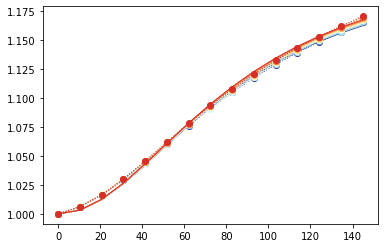

(150, 18) 10
[-9.49354588e-05 -1.70555096e-05]
[-9.4869428e-05 -1.7093922e-05]
[-9.46727732e-05 -1.71268456e-05]
[9.67737763e-05 1.73515292e-05]
[ 9.69427312e-05 -1.75097295e-05]
[ 9.58894207e-05 -1.74324341e-05]
[9.46428631e-05 1.73409103e-05]
[9.44865129e-05 1.73843521e-05]
[9.44223545e-05 1.74430148e-05]
[9.43601081e-05 1.75049373e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


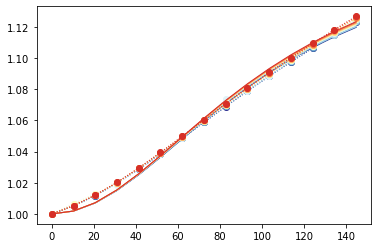

(150, 18) 10
[0.00086474 0.00090352]
[0.00086289 0.00090386]
[0.00086113 0.00090434]
[0.00085976 0.00090526]
[0.00085999 0.00090878]
[0.00085784 0.00090917]
[0.00085513 0.0009079 ]
[0.00085368 0.00090887]
[0.00085238 0.00091015]
[0.00085108 0.00091152]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


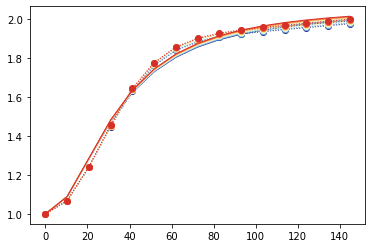

(150, 18) 10
[2.97521827e-04 9.73878721e-05]
[2.96948845e-04 9.75340403e-05]
[2.96400401e-04 9.76981437e-05]
[2.96590456e-04 9.80708861e-05]
[2.99241559e-04 9.94327924e-05]
[2.97535524e-04 9.94063542e-05]
[2.94486569e-04 9.86077961e-05]
[2.93441126e-04 9.86351401e-05]
[2.92823187e-04 9.88494776e-05]
[2.92202403e-04 9.90765013e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


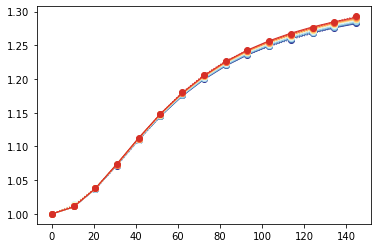

(150, 18) 10
[ 1.40619266e-04 -3.05090692e-05]
[1.40433516e-04 3.05787719e-05]
[1.40283607e-04 3.06581142e-05]
[1.40799987e-04 3.08380306e-05]
[-1.44243859e-04 -3.16546918e-05]
[-1.43337835e-04 -3.16901869e-05]
[ 1.40061264e-04 -3.11180088e-05]
[-1.39292273e-04  3.10910832e-05]
[-1.39084213e-04  3.11894711e-05]
[-1.38887413e-04  3.12952126e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


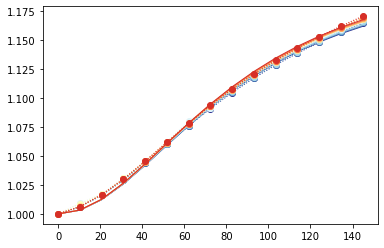

(150, 18) 10
[-9.49317571e-05  1.70294783e-05]
[-9.48610158e-05 -1.70738612e-05]
[-9.48047593e-05 -1.71224227e-05]
[-9.57333574e-05 -1.72223781e-05]
[-9.16560116e-05 -1.69083037e-05]
[9.50551753e-05 1.73551266e-05]
[9.43510172e-05 1.73120994e-05]
[9.44436568e-05 1.73969597e-05]
[9.43820103e-05 1.74615780e-05]
[9.43180387e-05 1.75286157e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


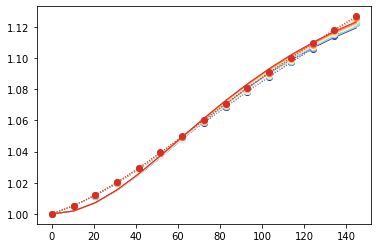

(150, 18) 10
[0.00086301 0.00090049]
[0.00086072 0.00090074]
[0.00085858 0.00090116]
[0.00085651 0.00090172]
[0.00085592 0.00090361]
[0.0008531  0.00090371]
[0.00085106 0.00090439]
[0.00084943 0.0009055 ]
[0.00084791 0.0009068 ]
[0.00084646 0.0009082 ]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


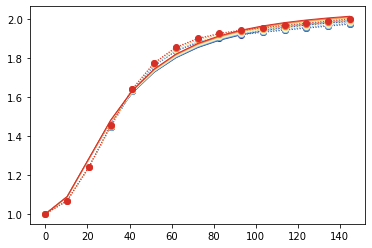

(150, 18) 10
[2.97632949e-04 9.72657301e-05]
[2.97002394e-04 9.74221702e-05]
[2.96464513e-04 9.76032004e-05]
[2.95291083e-04 9.76767138e-05]
[2.96164473e-04 9.82450591e-05]
[2.95121241e-04 9.83816742e-05]
[2.93946685e-04 9.84120236e-05]
[2.93181886e-04 9.85854091e-05]
[2.92527746e-04 9.88128876e-05]
[2.91867813e-04 9.90505696e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


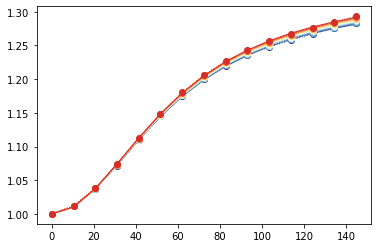

(150, 18) 10
[ 1.40667875e-04 -3.04791711e-05]
[ 1.40468689e-04 -3.05541807e-05]
[1.40351588e-04 3.06381710e-05]
[-1.39358904e-04  3.06357753e-05]
[1.39852079e-04 3.08202142e-05]
[ 1.40194854e-04 -3.10114169e-05]
[ 1.39583809e-04 -3.10247142e-05]
[-1.39241413e-04  3.10979499e-05]
[ 1.39030116e-04 -3.12036272e-05]
[ 1.38822914e-04 -3.13149767e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


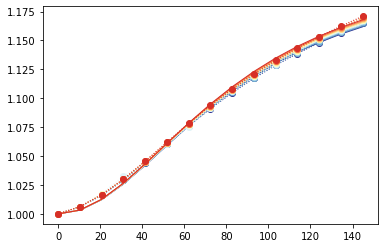

(150, 18) 10
[-9.49259725e-05 -1.70141560e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


[-9.48567921e-05 -1.70624090e-05]
[-9.49296381e-05 -1.71264426e-05]
[-9.67127820e-05  1.73199405e-05]
[9.14736035e-05 1.67816536e-05]
[9.25659257e-05 1.69864700e-05]
[9.43504953e-05 1.73213030e-05]
[9.44157662e-05 1.74064141e-05]
[9.43519007e-05 1.74746490e-05]
[9.42863973e-05 1.75453778e-05]


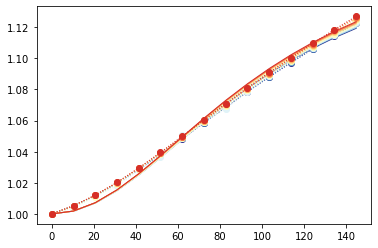

(150, 18) 10
[0.00086265 0.00089964]
[0.00086024 0.00089985]
[0.0008579 0.0009002]
[0.00085577 0.00090073]
[0.00085275 0.00090105]
[0.00085173 0.00090251]
[0.00084998 0.00090328]
[0.00084835 0.00090452]
[0.00084677 0.00090582]
[0.00084527 0.00090722]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


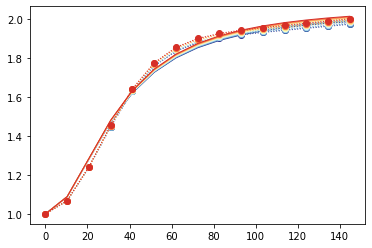

(150, 18) 10
[2.97666072e-04 9.72280464e-05]
[2.97006652e-04 9.73852267e-05]
[2.96193427e-04 9.75222450e-05]
[2.95962533e-04 9.77661683e-05]
[2.95533488e-04 9.83018110e-05]
[2.9498213e-04 9.8451675e-05]
[2.93611370e-04 9.82875423e-05]
[2.93091543e-04 9.85650472e-05]
[2.92431963e-04 9.87989711e-05]
[2.91758830e-04 9.90397179e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


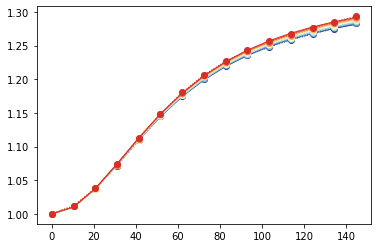

(150, 18) 10
[ 1.40681760e-04 -3.04702329e-05]
[ 1.40463968e-04 -3.05453687e-05]
[1.40025969e-04 3.06002690e-05]
[1.40481951e-04 3.07471904e-05]
[ 1.42019954e-04 -3.12615898e-05]
[ 1.40659350e-04 -3.11486388e-05]
[ 1.39253036e-04 -3.09579848e-05]
[-1.39216238e-04  3.10982542e-05]
[ 1.39012098e-04 -3.12079805e-05]
[ 1.38801507e-04 -3.13211160e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


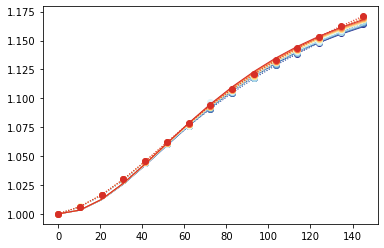

(150, 18) 10
[-9.49236756e-05 -1.70096483e-05]
[-9.48570921e-05 -1.70591575e-05]
[9.49885397e-05 1.71273817e-05]
[-9.43867100e-05  1.71534134e-05]
[ 9.39594379e-05 -1.72349837e-05]
[9.62417090e-05 1.75369796e-05]
[9.47186846e-05 1.73801859e-05]
[9.44158205e-05 1.74108900e-05]
[9.43419586e-05 1.74788854e-05]
[9.42756683e-05 1.75507806e-05]


<ipython-input-84-4dfa990f27b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])


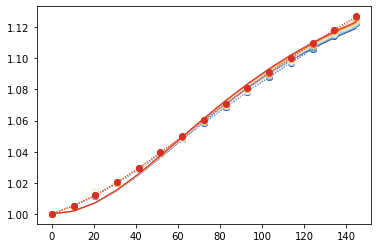

In [84]:
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega) +1

alphaT=[]
AT=[]
Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    for s,Qq in enumerate(Q):
        # print(s)
        y=d.iloc[s]/d.iloc[s,0]
        popt, pcov = curve_fit(scalingF, w,y,p0=[0.015,0.01])
        print(popt)
        plot(w, y, linewidth=1, color=plt.cm.RdYlBu_r(s/float(sQ)), marker='o', ls=':')
        plot(w, scalingF(w,popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(s/float(sQ)))
        
        alphaT.append(popt[0])
        AT.append(popt[1])
        Tf.append(T)
        
    return None


thets=df['theta'].unique()

# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in [1.0,2.0,3.0,4.0]:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        print(np.shape(df2), np.size(Qu))
        df2['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2['Q'].unique()
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=Qu,w=w,l=l, T=TT)
        show()

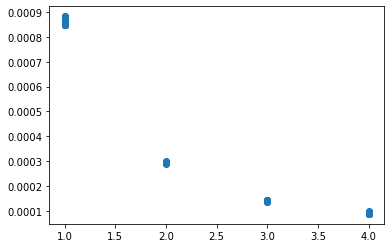

In [85]:
plt.scatter(Tf,np.abs(np.array(alphaT)))

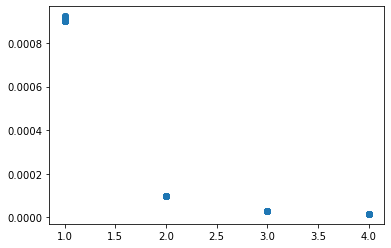

In [70]:
plt.scatter(Tf,np.abs(np.array(AT)))
# plt.ylim([0,0.0001])

-1.6182131051641502


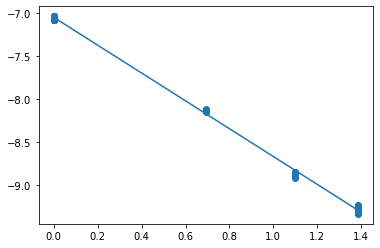

In [71]:
from scipy import stats
slope, intercept, r, p, se = stats.linregress(np.log(Tf),np.log(np.abs(np.array(alphaT))))
plt.scatter(np.log(Tf),np.log(np.abs(np.array(alphaT))))
plt.plot(np.log(Tf),np.log(Tf)*slope+intercept)
print(slope)
# plt.ylim([0,0.0001])

-2.9068444080439235


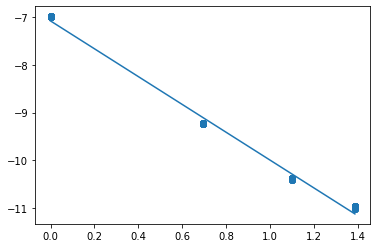

In [72]:
from scipy import stats
slope, intercept, r, p, se = stats.linregress(np.log(Tf),np.log(np.abs(np.array(AT))))
plt.scatter(np.log(Tf),np.log(np.abs(np.array(AT))))
plt.plot(np.log(Tf),np.log(Tf)*slope+intercept)
print(slope)
# plt.ylim([0,0.0001])

In [73]:
J=2*5.17 #in mev
tp1=568/J #in units of Js\
tp2=-tp1*108/568 #/tpp1
fill=0.5
def Fermi_Vel(kx,ky):
    
        sq3y2=np.sqrt(3)*ky/2
        sq3y=np.sqrt(3)*ky
        vx=-tp1*(-2*np.cos(sq3y2)*np.sin(kx/2)-2*np.sin(kx)) +6*tp2*np.cos(sq3y2)*np.sin(3*kx/2)
        vy=2*np.sqrt(3)*tp1*np.cos(kx/2)*np.sin(sq3y2)-2*np.sqrt(3)*tp2*(-np.cos(3*kx/2)*np.sin(sq3y2)-np.sin(sq3y))
        return [vx,vy]

# trying tanh fit for the frequency dependent part

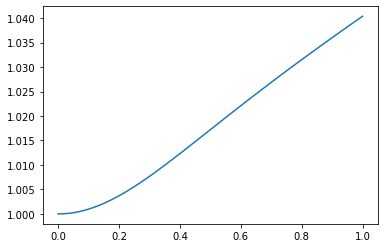

In [136]:
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*np.tanh(omega*np.abs(alpha)/np.abs(A)) +1
x=linspace(0,1,100)
plot(x, scalingF(x,0.1,0.041))

(150, 18) 10
[0.015      0.00881433]
[0.015      0.00882093]
[0.015      0.00882889]
[0.015      0.00883663]
[0.015      0.00884574]
[0.015   0.00886]
[0.015      0.00887823]
[0.015      0.00889571]
[0.015      0.00891534]
[0.015      0.00893731]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

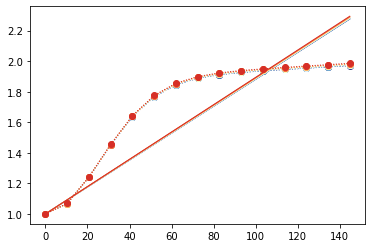

(150, 18) 10
[0.015      0.00229298]
[0.015     0.0022966]
[0.015      0.00230051]
[0.015    0.002301]
[0.015      0.00230534]
[0.015      0.00231236]
[0.015      0.00232126]
[0.015      0.00232796]
[0.015      0.00233491]
[0.015      0.00234237]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

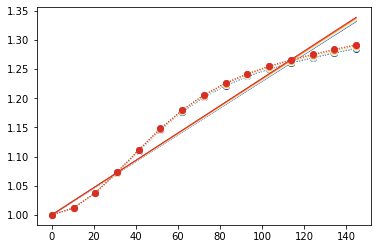

(150, 18) 10
[0.015      0.00120081]
[0.015      0.00120296]
[0.015      0.00120519]
[0.015      0.00120314]
[0.015      0.00120566]
[0.015      0.00121071]
[0.015      0.00121738]
[0.015      0.00122143]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

[0.015      0.00122549]
[0.015      0.00122985]


/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


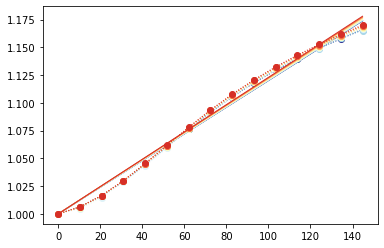

(150, 18) 10
[0.015      0.00084038]
[0.015      0.00084188]
[0.015      0.00084342]
[0.015      0.00084336]
[0.015      0.00083182]
[0.015     0.0008353]
[0.015      0.00085192]
[0.015      0.00085478]
[0.015      0.00085761]
[0.015      0.00086065]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

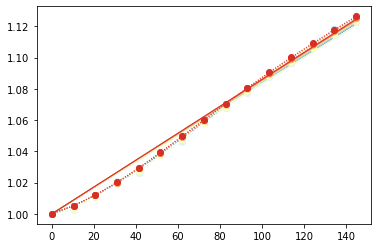

(150, 18) 10
[0.015      0.00882018]
[0.015      0.00882862]
[0.015      0.00883839]
[0.015      0.00885074]
[0.015      0.00886815]
[0.015      0.00888107]
[0.015      0.00889151]
[0.015      0.00890911]
[0.015      0.00892869]
[0.015      0.00895034]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

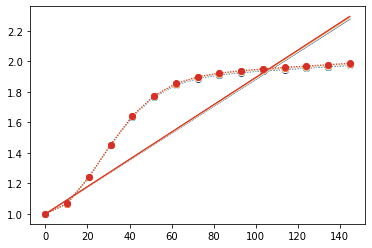

(150, 18) 10
[0.015      0.00228963]
[0.015      0.00229399]
[0.015      0.00229906]
[0.015      0.00230605]
[0.015     0.0023181]
[0.015      0.00232197]
[0.015      0.00232176]
[0.015      0.00232851]
[0.015      0.00233576]
[0.015      0.00234345]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

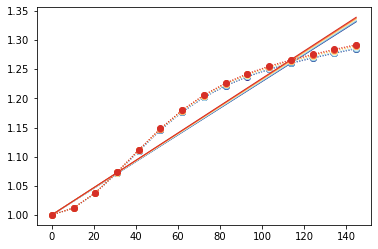

(150, 18) 10
[0.015      0.00119919]
[0.015      0.00120173]
[0.015      0.00120488]
[0.015      0.00121003]
[0.015      0.00122029]
[0.015      0.00122131]
[0.015      0.00121793]
[0.015      0.00122182]
[0.015      0.00122604]
[0.015      0.00123052]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

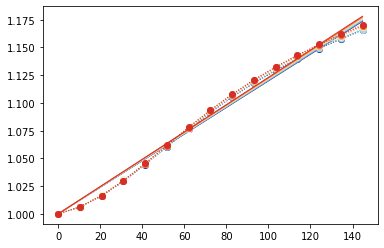

(150, 18) 10
[0.015      0.00083943]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[0.015      0.00084118]
[0.015      0.00084288]
[0.015      0.00083978]
[0.015      0.00083468]
[0.015     0.0008379]
[0.015      0.00085221]
[0.015      0.00085515]
[0.015      0.00085808]
[0.015     0.0008612]


/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of

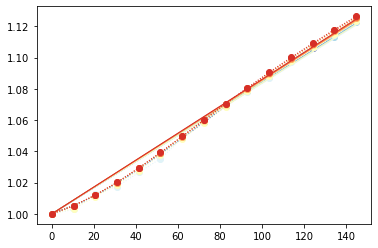

<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(150, 18) 10
[0.015      0.00881955]
[0.015      0.00883393]
[0.015      0.00884905]
[0.015      0.00886306]
[0.015      0.00887934]
[0.015      0.00889934]
[0.015     0.0089187]
[0.015      0.00893904]
[0.015      0.00896051]
[0.015      0.00898337]


/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of

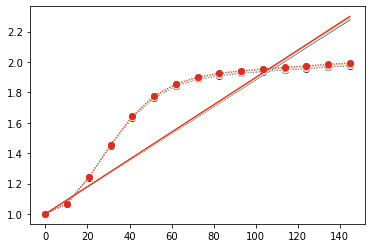

(150, 18) 10
[0.015      0.00228287]
[0.015     0.0022886]
[0.015      0.00229453]
[0.015      0.00229772]
[0.015      0.00230537]
[0.015      0.00231524]
[0.015     0.0023217]
[0.015      0.00232966]
[0.015      0.00233769]
[0.015      0.00234608]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

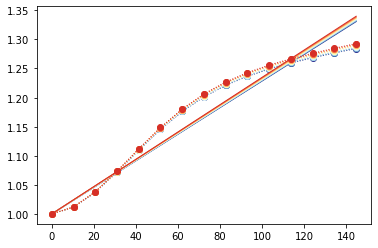

(150, 18) 10
[0.015      0.00119607]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[0.015      0.00119929]
[0.015      0.00120258]
[0.015      0.00120253]
[0.015      0.00120745]
[0.015      0.00121478]
[0.015      0.00121801]
[0.015      0.00122272]
[0.015      0.00122736]
[0.015      0.00123221]


/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of

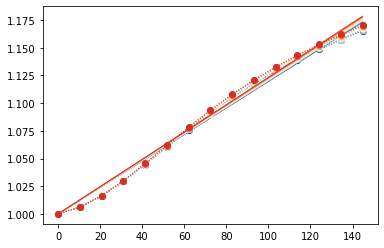

<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

(150, 18) 10
[0.015      0.00083769]
[0.015      0.00083989]
[0.015      0.00084245]
[0.015      0.00084353]
[0.015      0.00085039]
[0.015      0.00085181]
[0.015      0.00085313]
[0.015      0.00085601]
[0.015      0.00085922]
[0.015      0.00086257]


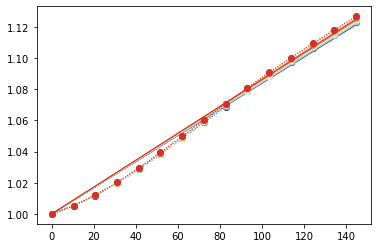

(150, 18) 10
[0.015      0.00880693]
[0.015     0.0088268]
[0.015      0.00884731]
[0.015      0.00886881]
[0.015      0.00890135]
[0.015      0.00892474]
[0.015      0.00893685]
[0.015      0.00895974]
[0.015      0.00898442]
[0.015      0.00900996]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

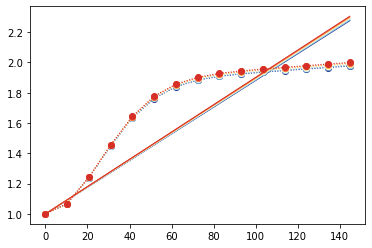

(150, 18) 10
[0.015      0.00227739]
[0.015     0.0022841]
[0.015      0.00229112]
[0.015      0.00229883]
[0.015     0.0023156]
[0.015      0.00232479]
[0.015      0.00232374]
[0.015      0.00233054]
[0.015     0.0023393]
[0.015     0.0023484]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

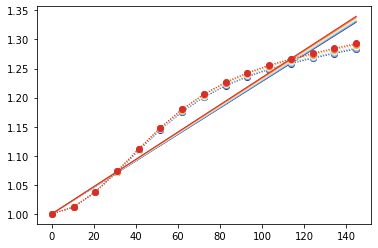

(150, 18) 10
[0.015     0.0011937]
[0.015     0.0011974]
[0.015     0.0012013]
[0.015     0.0012057]
[0.015      0.00121966]
[0.015      0.00122565]
[0.015      0.00122056]
[0.015     0.0012236]
[0.015     0.0012286]
[0.015      0.00123384]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

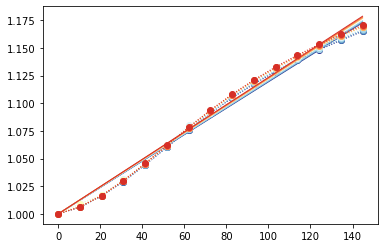

(150, 18) 10
[0.015      0.00083643]
[0.015      0.00083895]
[0.015     0.0008416]
[0.015      0.00084203]
[0.015      0.00084614]
[0.015      0.00085192]
[0.015     0.0008531]
[0.015      0.00085684]
[0.015      0.00086033]
[0.015      0.00086394]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

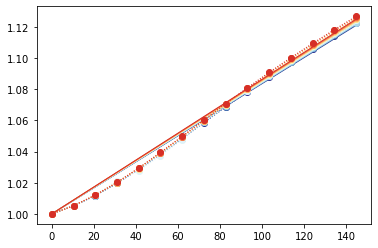

(150, 18) 10
[0.015      0.00879339]
[0.015      0.00881636]
[0.015      0.00883988]
[0.015      0.00886414]
[0.015      0.00888857]
[0.015      0.00891498]
[0.015      0.00894038]
[0.015      0.00896653]
[0.015      0.00899344]
[0.015      0.00902091]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

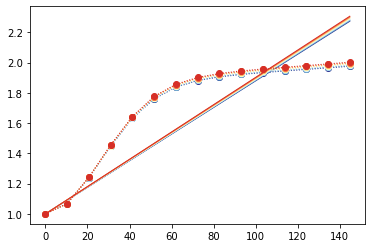

(150, 18) 10
[0.015      0.00227391]
[0.015      0.00228119]
[0.015      0.00228854]
[0.015      0.00229715]
[0.015      0.00230571]
[0.015      0.00231477]
[0.015      0.00232231]
[0.015      0.00233093]
[0.015      0.00234022]
[0.015      0.00234982]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

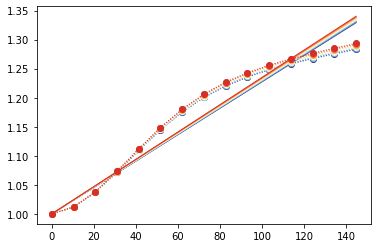

(150, 18) 10
[0.015      0.00119227]
[0.015      0.00119625]
[0.015      0.00120016]
[0.015      0.00120538]
[0.015     0.0012103]
[0.015      0.00121574]
[0.015      0.00121944]
[0.015      0.00122415]
[0.015      0.00122945]
[0.015      0.00123498]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

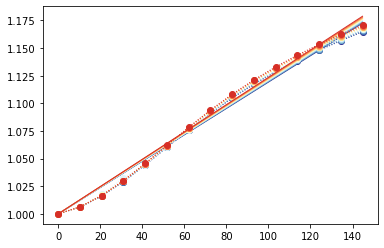

(150, 18) 10
[0.015     0.0008357]
[0.015     0.0008384]
[0.015      0.00084119]
[0.015     0.0008421]
[0.015      0.00084027]
[0.015      0.00084537]
[0.015      0.00085354]
[0.015      0.00085744]
[0.015      0.00086112]
[0.015      0.00086492]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

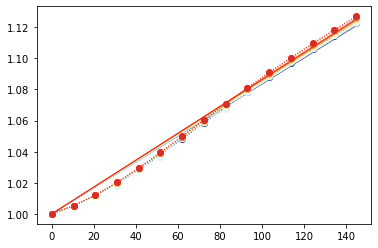

(150, 18) 10
[0.015      0.00878838]
[0.015     0.0088122]
[0.015      0.00883676]
[0.015      0.00886125]
[0.015      0.00889157]
[0.015      0.00891588]
[0.015      0.00893963]
[0.015      0.00896703]
[0.015      0.00899454]
[0.015      0.00902252]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

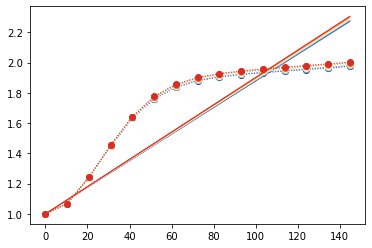

(150, 18) 10
[0.015      0.00227284]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[0.015      0.00228031]
[0.015      0.00228823]
[0.015      0.00229523]
[0.015      0.00231011]
[0.015      0.00231714]
[0.015      0.00232133]
[0.015      0.00233099]
[0.015      0.00234047]
[0.015      0.00235022]


/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of

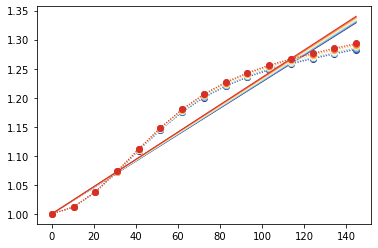

<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

(150, 18) 10
[0.015      0.00119185]
[0.015      0.00119593]
[0.015      0.00120041]
[0.015     0.0012037]
[0.015      0.00121548]
[0.015      0.00121854]
[0.015      0.00121856]
[0.015      0.00122429]
[0.015      0.00122972]
[0.015      0.00123533]


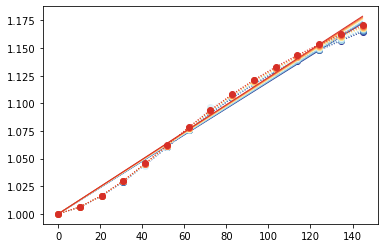

(150, 18) 10
[0.015      0.00083549]
[0.015      0.00083824]
[0.015      0.00084096]
[0.015     0.0008451]
[0.015      0.00085146]
[0.015      0.00085526]
[0.015     0.0008547]
[0.015      0.00085766]
[0.015      0.00086137]
[0.015      0.00086524]


<ipython-input-130-27fe2b699131>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q']=df2['Q']*np.sign(df2['QFX'])
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the param

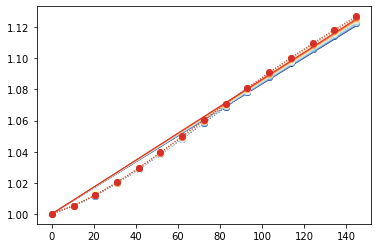

In [130]:
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*np.tanh(omega*np.abs(alpha)/np.abs(A)) +1

alphaT=[]
AT=[]
Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    d = df.pivot(index=args[0], columns=args[1], values=args[2])
    sQ=np.size(Q)
    for s,Qq in enumerate(Q):
        # print(s)
        y=d.iloc[s]/d.iloc[s,0]
        popt, pcov = curve_fit(scalingF, w,y,p0=[0.015,0.01])
        print(popt)
        plot(w, y, linewidth=1, color=plt.cm.RdYlBu_r(s/float(sQ)), marker='o', ls=':')
        plot(w, scalingF(w,popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(s/float(sQ)))
        
        alphaT.append(popt[0])
        AT.append(popt[1])
        Tf.append(T)
        
    return None


thets=df['theta'].unique()

# thets=[df['theta'].unique()[0]]
for l,th in enumerate(thets):
    for TT in [1.0,2.0,3.0,4.0]:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        print(np.shape(df2), np.size(Qu))
        df2['Q']=df2['Q']*np.sign(df2['QFX'])
        Qu=df2['Q'].unique()
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=Qu,w=w,l=l, T=TT)
        show()